## Problem statement

Bulid a regression model using sklean to predict the count of rental bike agaist the relevant repsonse varaibles

## Data Description:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8,             t_max=+39(only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-
t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- cnt: count of total rental bikes including both casual and registered

## Importing the important Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeRegressor

In [2]:
dt=pd.read_csv('vehicle.csv')

In [3]:
dt.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


# Checking Null Values

In [4]:
dt.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
cnt           0
dtype: int64

## Feature-Engineering

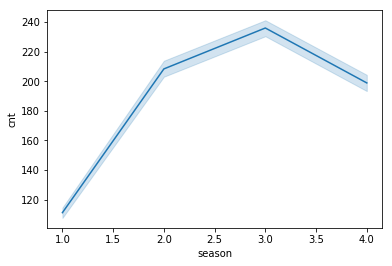

In [11]:
sns.lineplot(x='season',y='cnt',data=dt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

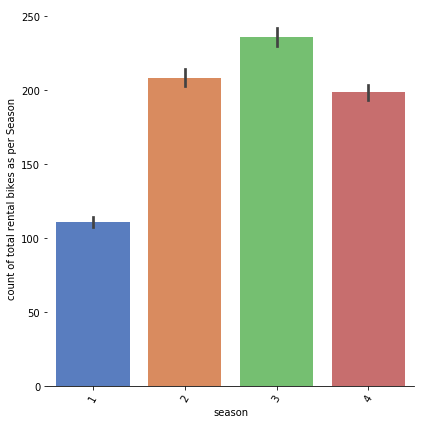

In [13]:
g = sns.factorplot(x='season',y='cnt',data=dt,kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('count of total rental bikes as per Season')
plt.xticks(rotation = 60)

#### Observation
* **Season data is plotted w.r.t count of rental bike**
* **From the graph we can see in season 3 which is summer has the highest count of rental bike**

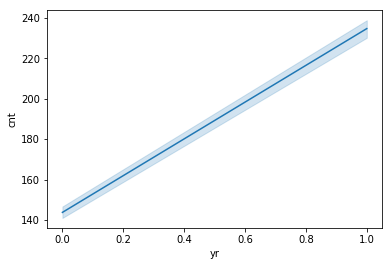

In [14]:
sns.lineplot(x='yr',y='cnt',data=dt)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

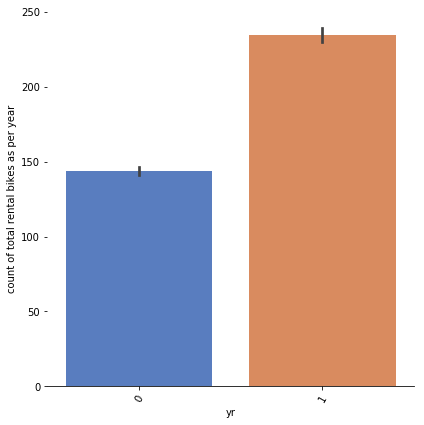

In [16]:
g = sns.factorplot(x='yr',y='cnt',data=dt,kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('count of total rental bikes as per year')
plt.xticks(rotation = 60)

#### Observation
* **Year data is plotted w.r.t count of rental bike**
* **From the graph we can see in year with 1 which is 2012 has the highest count of rental bike**

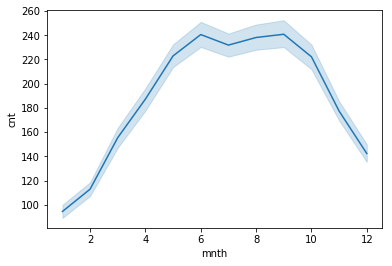

In [17]:
sns.lineplot(x='mnth',y='cnt',data=dt)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

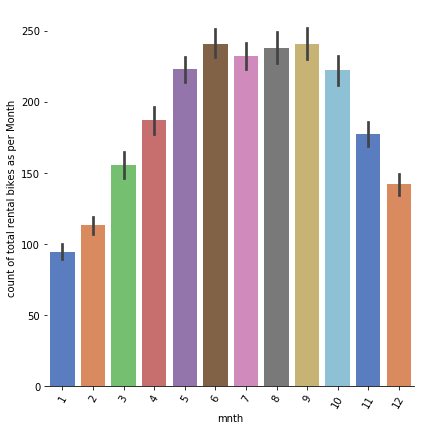

In [18]:
g = sns.factorplot(x='mnth',y='cnt',data=dt,kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('count of total rental bikes as per Month')
plt.xticks(rotation = 60)

#### Observation
* **Month data is plotted w.r.t count of rental bike**
* **From the graph we can see in 6th month has the highest count of rental bike**

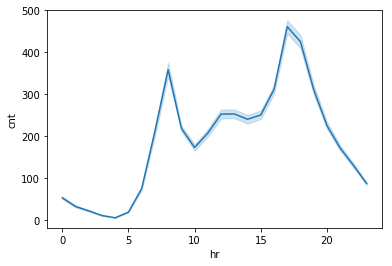

In [19]:
sns.lineplot(x='hr',y='cnt',data=dt)

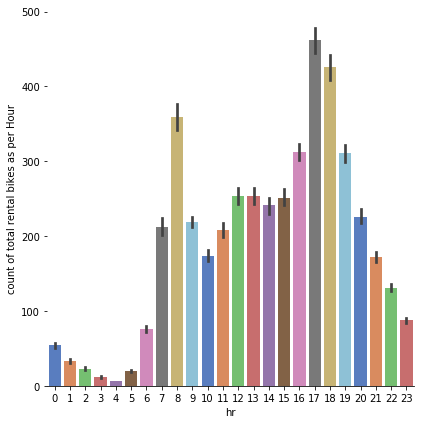

In [20]:
g = sns.factorplot(x='hr',y='cnt',data=dt,kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('count of total rental bikes as per Hour')


#### Observation
* **Hour data is plotted w.r.t count of rental bike**
* **From the graph we can see in 17th hour has the highest count of rental bike**

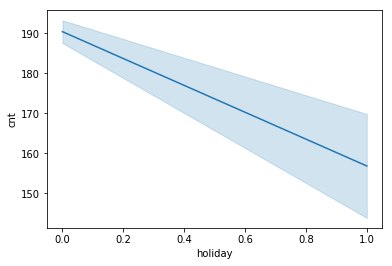

In [21]:
sns.lineplot(x='holiday',y='cnt',data=dt)

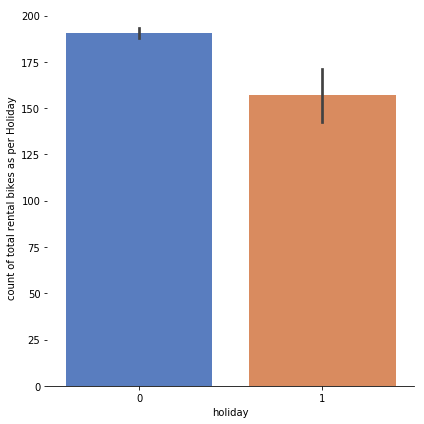

In [22]:
g = sns.factorplot(x='holiday',y='cnt',data=dt,kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('count of total rental bikes as per Holiday')


#### Observation
* **Holiday data is plotted w.r.t count of rental bike**
* **Her 1 stand Holiday and 0 stant for not holiday. Hence we can clearly see that on non holiday count of rentak bike is high**

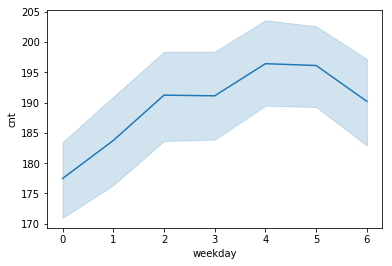

In [23]:
sns.lineplot(x='weekday',y='cnt',data=dt)

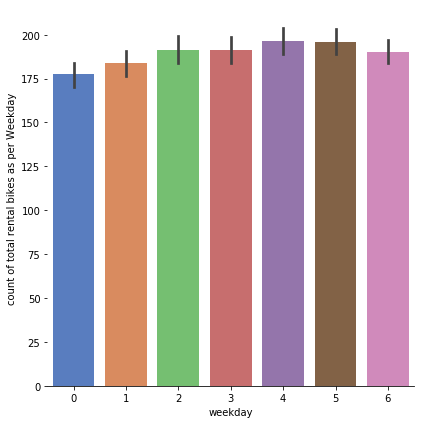

In [24]:
g = sns.factorplot(x='weekday',y='cnt',data=dt,kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('count of total rental bikes as per Weekday')


#### Observation
* **Weekday data is plotted w.r.t count of rental bike**
* **From the graph we can see in weekday with value 5 has the highest count of rental bike**

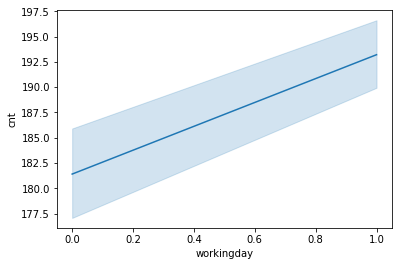

In [5]:
sns.lineplot(x='workingday',y='cnt',data=dt)

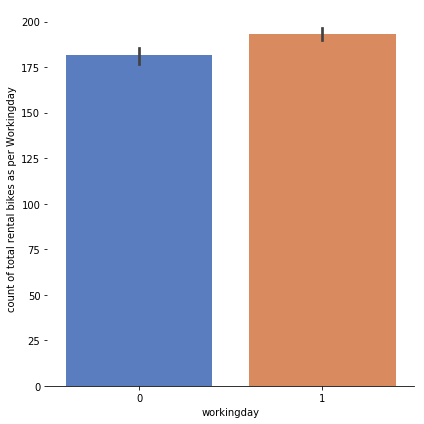

In [26]:
g = sns.factorplot(x='workingday',y='cnt',data=dt,kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('count of total rental bikes as per Workingday')


#### Observation
* **Workingday is plotted w.r.t count of rental bike**
* **From the graph we can see in workingday value with 1 which is working day has the highest count of rental bike**

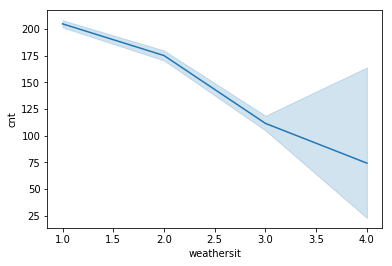

In [27]:
sns.lineplot(x='weathersit',y='cnt',data=dt)

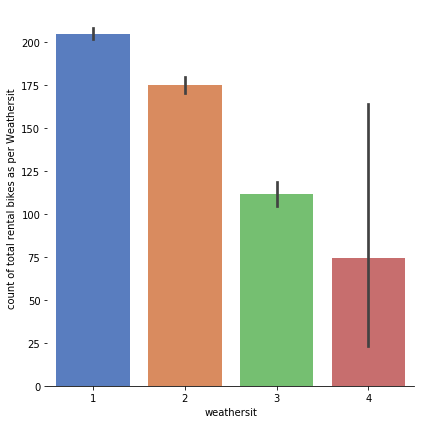

In [28]:
g = sns.factorplot(x='weathersit',y='cnt',data=dt,kind='bar',size=6,palette='muted')

g.despine(left=True)

g = g.set_ylabels('count of total rental bikes as per Weathersit')


#### Observation
* **Weathersit is plotted w.r.t count of rental bike**
* **From the graph we can see with weathersit value with 1  which indicate clear wheather has the highest count of rental bike**

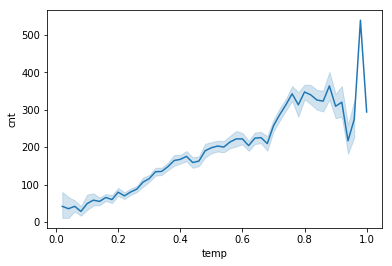

In [29]:
sns.lineplot(x='temp',y='cnt',data=dt)

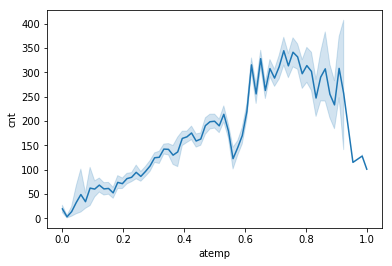

In [31]:
sns.lineplot(x='atemp',y='cnt',data=dt)

## Feature-Selection

* **Droping the attribute which are not needed**

In [6]:
dt.drop(['instant','dteday'],axis=1,inplace=True)

* **Before applying any machine learning algorithm to the dataset we will scalled the data**

In [7]:
min_dt=dt.min()
range_dt=(dt-min_dt).max()
dt_scaled = (dt-min_dt)/range_dt

In [9]:
def correlation_feature(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation_feature(dt_scaled, 0.9)
len(set(corr_features))

1

In [11]:
corr_features

{'atemp'}

In [8]:
x= dt_scaled.drop(['cnt'],axis =1)
y = dt_scaled['cnt']

In [47]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [48]:
feature = ' + '.join(dt_scaled.drop('cnt', axis = 1).columns)
'cnt ~ ' + feature

'cnt ~ season + yr + mnth + hr + holiday + weekday + workingday + weathersit + temp + atemp + hum + windspeed + casual'

In [49]:
mod = ols('cnt ~ ' + feature , data = dt_scaled)
# fit the model
lm = mod.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2091.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:55:30   Log-Likelihood:                 12773.
No. Observations:               17379   AIC:                        -2.552e+04
Df Residuals:                   17365   BIC:                        -2.541e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0658      0.006    -10.957      0.000      -0.078      -0.054
season         0.0493      0.004     11.031      0.000       0.041       0.058
yr             0.0584      0.002     32.643      0.000       0.055       0.062
mnth           0.0007      0.005      0.147      0.883      -0.009       0.011
hr             0.1142      0.003     35.949      0.000       0.108       0.120
holiday        0.0056      0.005      1.019      0.308      -0.005       0.016
weekday       -0.0004      0.003     -0.163      0.871      -0.006       0.005
workingday     0.0888      0.002     41.539      0.000       0.085       0.093
weathersit    -0.0250      0.005     -5.336      0.000      -0.034      -0.016
temp          -0.0455      0.030     -1.534      0.125      -0.104       0.013
atemp          0.0876      0.034      2.576      0.010       0.021       0.154
hum           -0.0349      0.006     -5.932      0.000      -0.046      -0.023
windspeed      0.0301      0.007      4.491      0.000       0.017       0.043
casual         0.8822      0.009     99.290      0.000       0.865       0.900
==============================================================================
Omnibus:                     6215.597   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22891.074
Skew:                           1.792   Prob(JB):                         0.00
Kurtosis:                       7.332   Cond. No.                         99.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,atemp,336.86
8,temp,285.54
2,mnth,11.64
10,hum,10.89
0,season,9.87
3,hr,4.04
6,workingday,3.80
11,windspeed,3.15
5,weekday,3.08
12,casual,2.77


In [12]:
dt_scaled.drop(['atemp','holiday'],axis=1,inplace=True)

#### Observation
* **We drop atemp and holiday**

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Model Development
* **In this section I will use differnt machine learning algorithm to predict the life expentancy for the available data set**

## Performance Metric
* **I am going to use R square value as performance metric. The intution behind R square value is when R square is closer to 1 indicates that it's a better model**

## Linear Regression

In [14]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
model_pred_tr=model_lr.predict(x_train)
model_pred_test=model_lr.predict(x_test)

In [15]:
print('R2 square for train',r2_score(y_train,model_pred_tr))
print('R2 square for test',r2_score(y_test,model_pred_test))

R2 square for train 0.6127771385209302
R2 square for test 0.6027364719746959


In [16]:
print('Mean squared error for train',mean_squared_error(y_train,model_pred_tr))
print('Mean squared error for test',mean_squared_error(y_test,model_pred_test))

Mean squared error for train 0.013597450527209929
Mean squared error for test 0.013174685123212106


Text(0, 0.5, 'Predicted Count ')

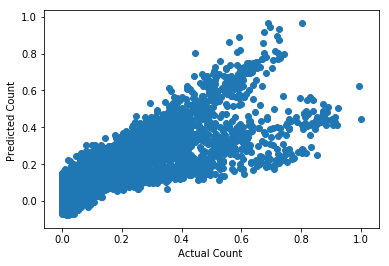

In [17]:
plt.scatter(y_test,model_pred_test)
plt.xlabel('Actual Count ')
plt.ylabel('Predicted Count ')

#### Observation
* **As We know if R square vale is close to 1 it indicate that it's a good model**
* **From the above R square value for train and test I can see that both are not  close to 1**\

### Random Forest

In [18]:
model_rand=RandomForestRegressor()
model_rand.fit(x_train,y_train)
model_rand_train=model_rand.predict(x_train)
model_rand_test=model_rand.predict(x_test)

In [19]:
print('R2 square for train',r2_score(y_train,model_rand_train))
print('R2 square for test',r2_score(y_test,model_rand_test))

R2 square for train 0.9950211433550349
R2 square for test 0.9636488023810879


In [20]:
print('Mean squared error for train',mean_squared_error(y_train,model_rand_train))
print('Mean squared error for test',mean_squared_error(y_test,model_rand_test))

Mean squared error for train 0.0001748340907698256
Mean squared error for test 0.0012055362465852146


Text(0, 0.5, 'Predicted Count ')

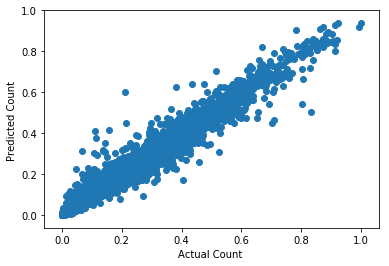

In [21]:
plt.scatter(y_test,model_rand_test)
plt.xlabel('Actual Count ')
plt.ylabel('Predicted Count ')

#### Observation
* **From Random forest model I am getting R2 square value more closer to 1 which indicate that this model is better than Linear Regression model**

In [65]:
model_desc=DecisionTreeRegressor()
model_desc.fit(x_train,y_train)
model_desc_train=model_rand.predict(x_train)
model_desc_test=model_rand.predict(x_test)

In [66]:
print('R2 square for train',r2_score(y_train,model_desc_train))
print('R2 square for test',r2_score(y_test,model_desc_test))

R2 square for train 0.9926936509475669
R2 square for test 0.9592342150051426


In [67]:
print('Mean squared error for train',mean_squared_error(y_train,model_desc_train))
print('Mean squared error for test',mean_squared_error(y_test,model_desc_test))

Mean squared error for train 0.0002565647064212805
Mean squared error for test 0.0013519398163165935


Text(0, 0.5, 'Predicted Count ')

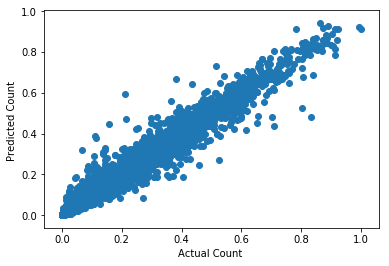

In [68]:
plt.scatter(y_test,model_desc_test)
plt.xlabel('Actual Count ')
plt.ylabel('Predicted Count ')

#### Observation
* **From Decision model I am getting R2 square value more closer to 1 but less then Random Forest model**

#### Observation
* **After applying Random forest and Linear regression and Decision Tree we got best R2 square result for Random forest**
* **So we can conclude that the model we created using Random forest algorith is the best model for our data set**